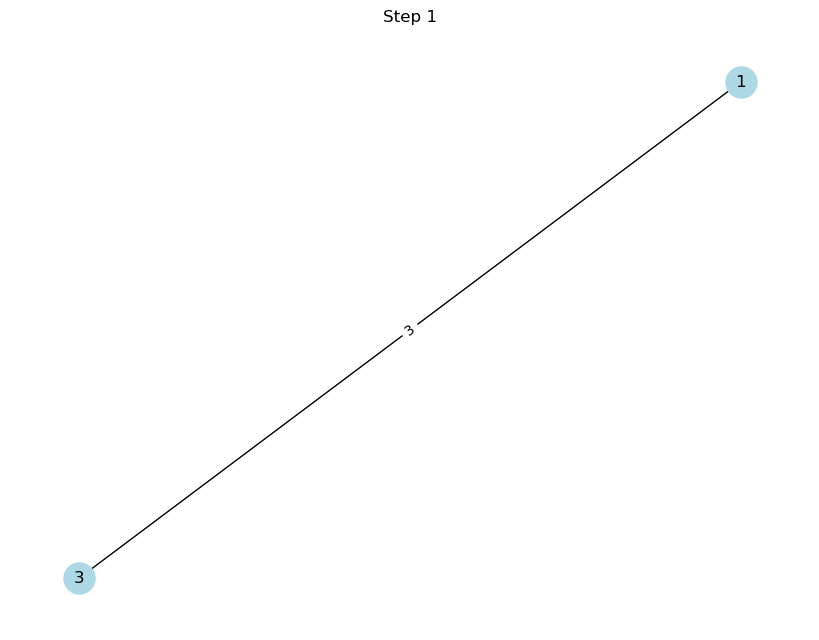

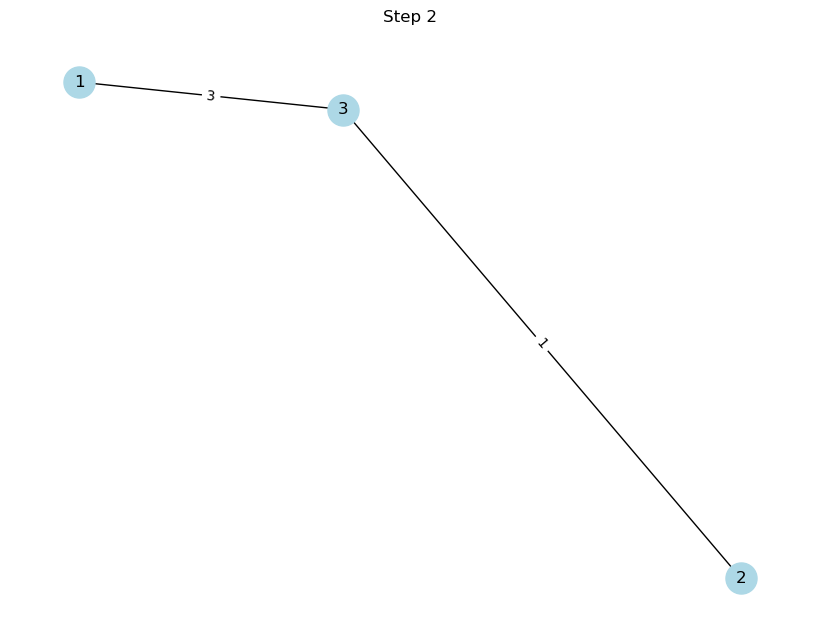

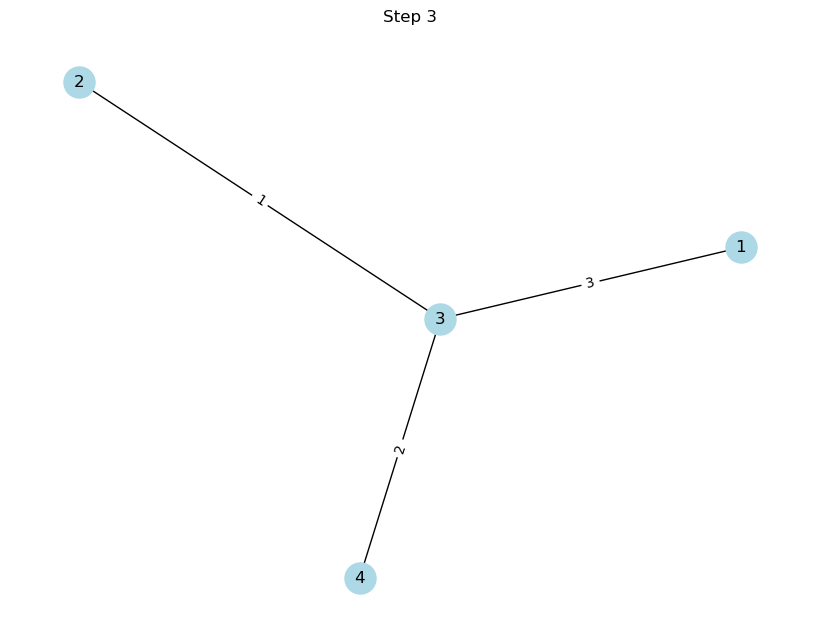

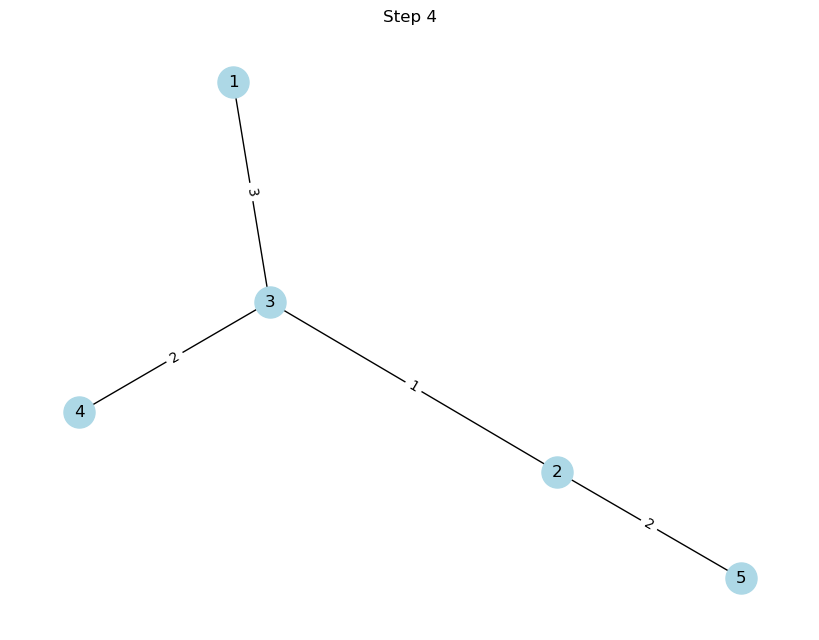

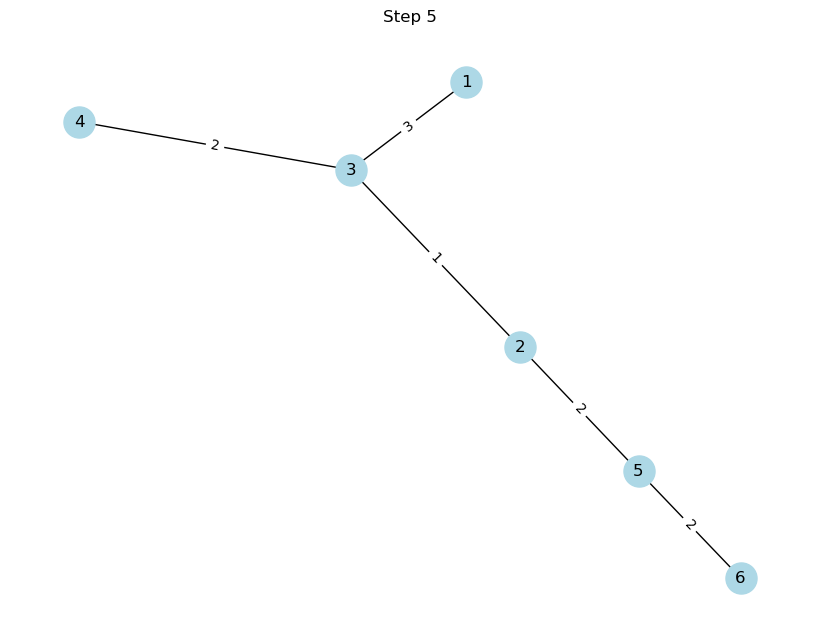

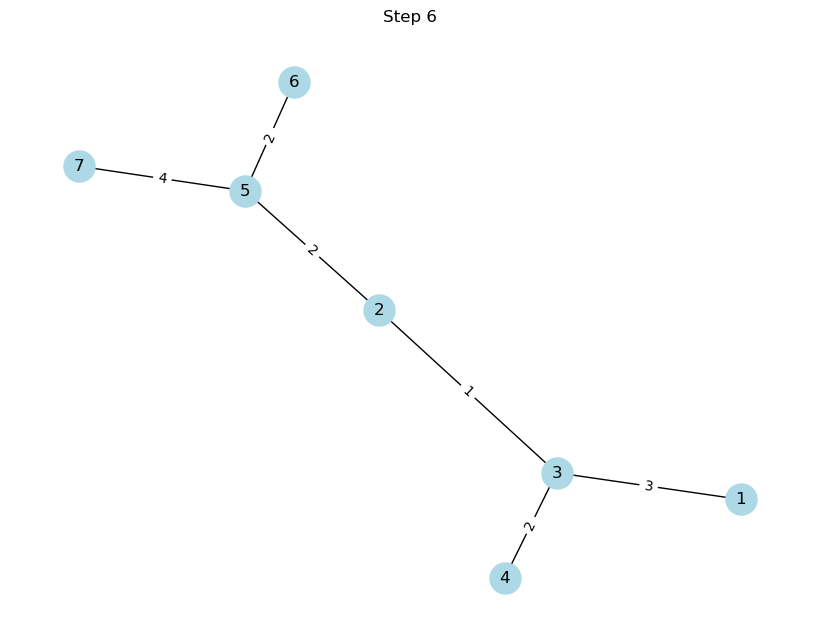

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Given edges and their weights
edges = [
    (1, 2, 4),
    (1, 3, 3),
    (1, 4, 5),
    (2, 3, 1),
    (2, 5, 2),
    (3, 5, 4),
    (3, 6, 8),
    (3, 4, 2),
    (4, 6, 3),
    (5, 6, 2),
    (5, 7, 4),
    (6, 7, 8),
]

# Create a graph
G = nx.Graph()
G.add_weighted_edges_from(edges)

# Function to apply Prim's algorithm and plot the graph at each step
def prims_algorithm(G, start_node):
    # Initial setup
    MST = nx.Graph()
    nodes = list(G.nodes)
    visited = [start_node]
    steps = []

    # Iterate to create the MST
    while set(visited) != set(nodes):
        # Create a list of edges from visited nodes to unvisited nodes
        edges = [(i, j, G[i][j]['weight']) for i in visited for j in G.neighbors(i) if j not in visited]
        
        # Find the edge with the minimum weight
        edge = min(edges, key=lambda x: x[2])
        
        # Add the edge to the MST
        MST.add_edge(edge[0], edge[1], weight=edge[2])
        
        # Add the new node to the visited list
        visited.append(edge[1])

        # Save the current state of the MST for plotting
        steps.append(MST.copy())

    return steps

# Apply Prim's algorithm starting at node O (node 1 in our representation)
steps = prims_algorithm(G, 1)

# Plotting each step
for i, step in enumerate(steps):
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(step)
    nx.draw(step, pos, with_labels=True, node_color='lightblue', node_size=500)
    labels = nx.get_edge_attributes(step, 'weight')
    nx.draw_networkx_edge_labels(step, pos, edge_labels=labels)
    plt.title(f"Step {i+1}")
    plt.show()


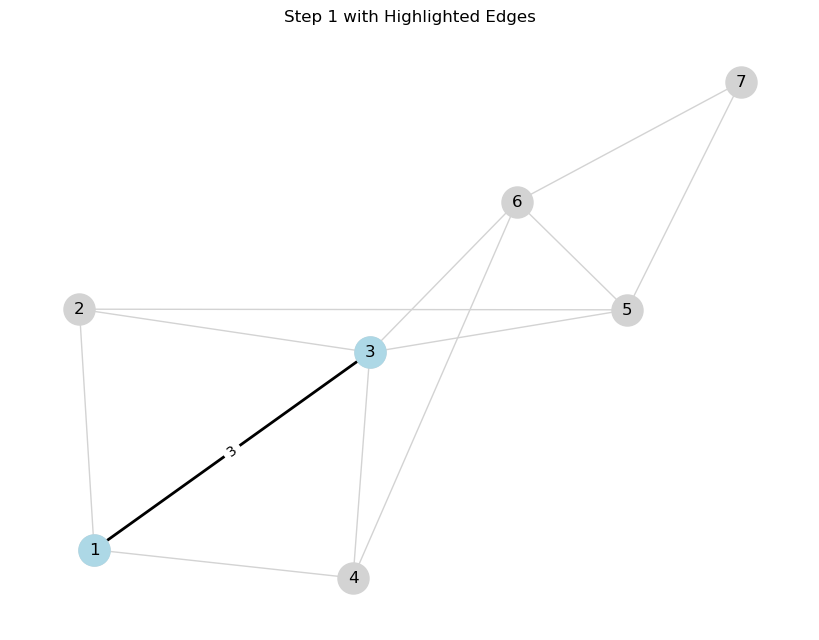

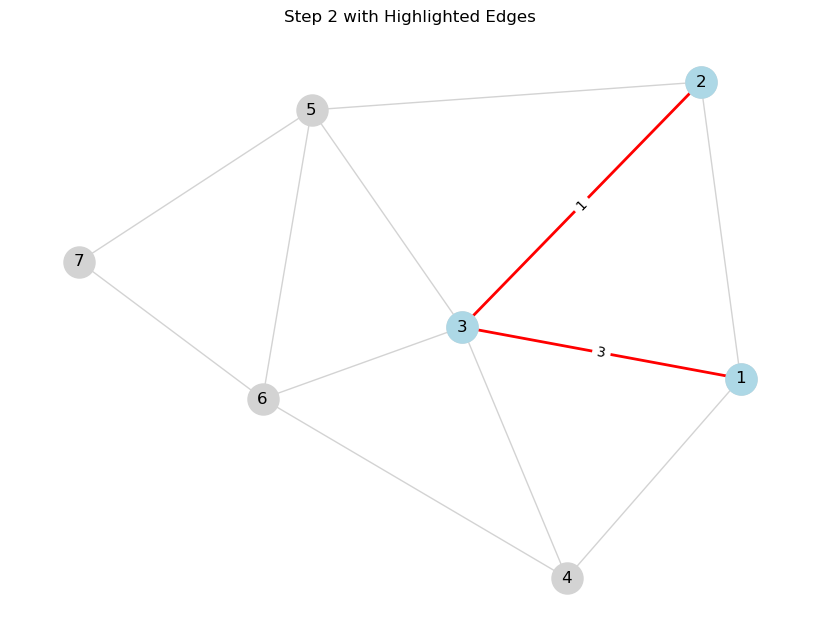

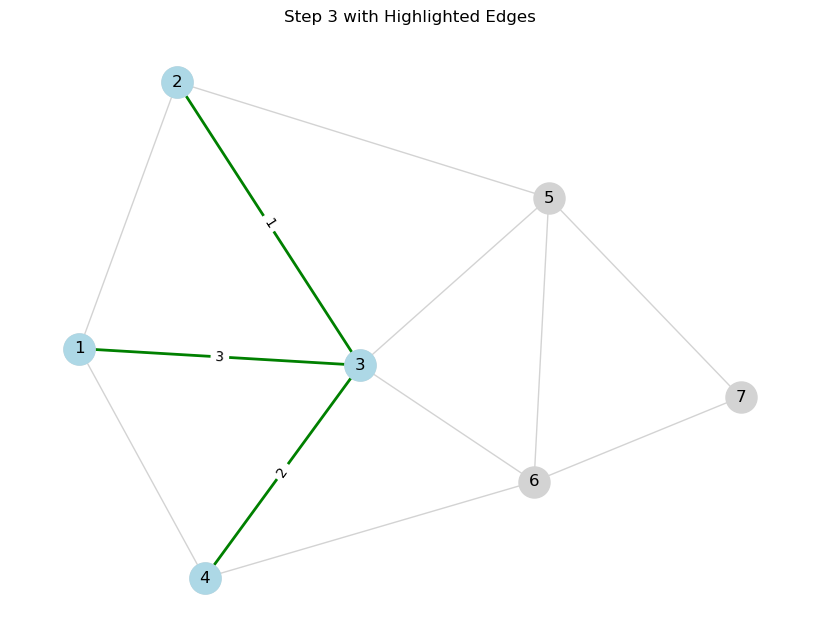

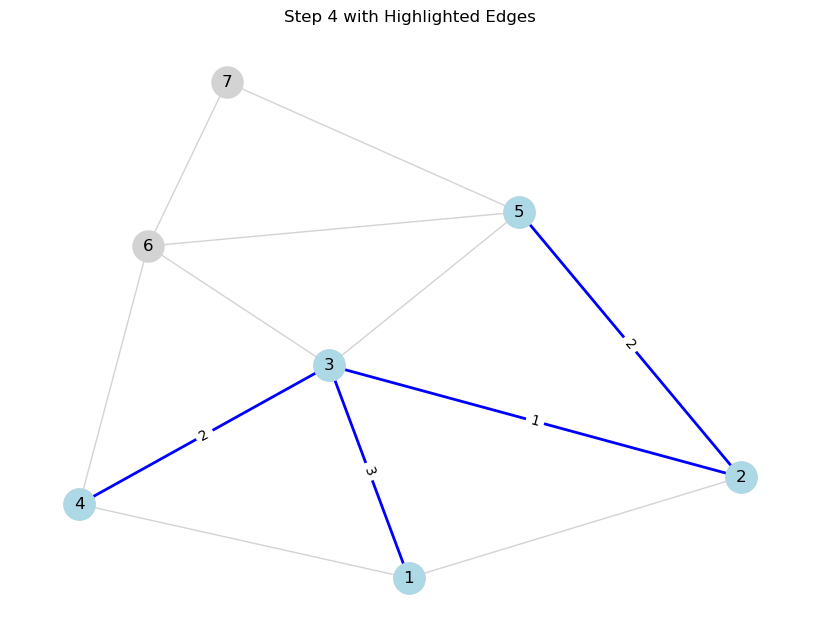

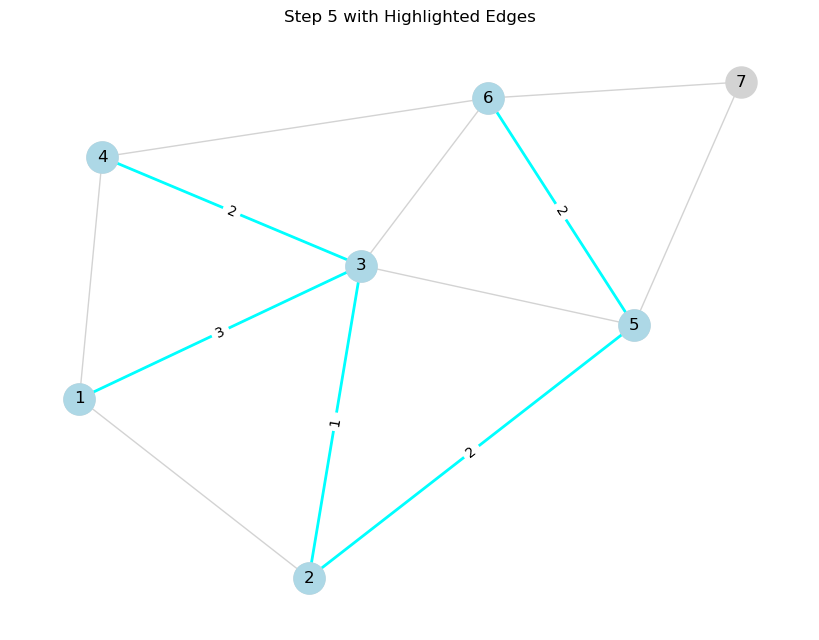

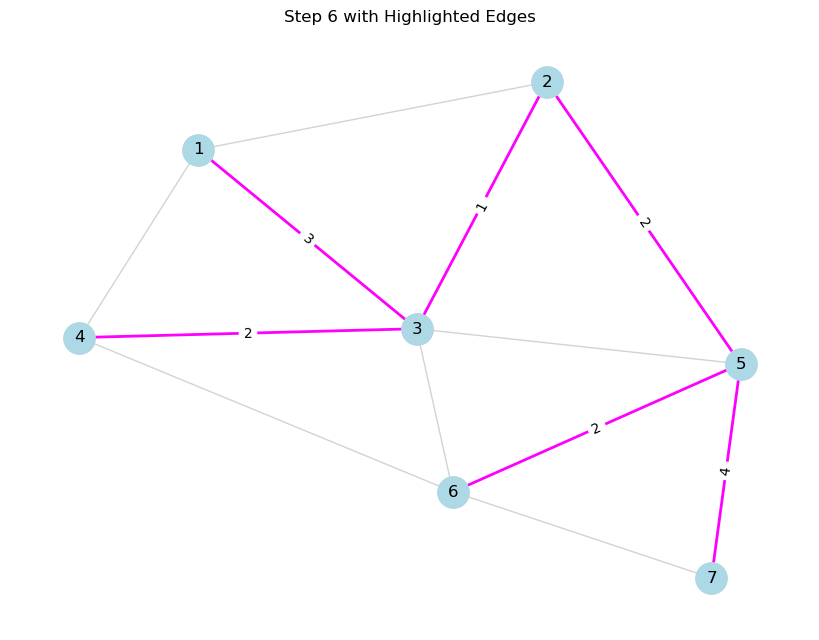

In [2]:
# Function to apply Prim's algorithm and plot the graph at each step with color differentiation
def prims_algorithm_with_colors(G, start_node):
    MST = nx.Graph()
    nodes = list(G.nodes)
    visited = [start_node]
    steps = []

    # Colors for the edges and nodes
    edge_colors = ['black', 'red', 'green', 'blue', 'cyan', 'magenta', 'yellow']
    node_colors = ['lightblue' if node in visited else 'lightgrey' for node in G.nodes]

    while set(visited) != set(nodes):
        edges = [(i, j, G[i][j]['weight']) for i in visited for j in G.neighbors(i) if j not in visited]
        edge = min(edges, key=lambda x: x[2])
        MST.add_edge(edge[0], edge[1], weight=edge[2])
        visited.append(edge[1])
        steps.append((MST.copy(), visited.copy(), edge_colors[len(steps) % len(edge_colors)]))

    return steps

# Apply Prim's algorithm with color differentiation
steps_with_colors = prims_algorithm_with_colors(G, 1)

# Plotting each step with different colors
for i, (step, visited, color) in enumerate(steps_with_colors):
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G)  # Use the same layout for consistency

    # Draw the full graph with light colors
    nx.draw(G, pos, with_labels=True, node_color='lightgrey', edge_color='lightgrey', node_size=500)

    # Draw the current MST with highlighted colors
    nx.draw_networkx_nodes(step, pos, nodelist=visited, node_color='lightblue', node_size=500)
    nx.draw_networkx_edges(step, pos, edge_color=color, width=2)
    labels = nx.get_edge_attributes(step, 'weight')
    nx.draw_networkx_edge_labels(step, pos, edge_labels=labels)

    plt.title(f"Step {i+1} with Highlighted Edges")
    plt.show()


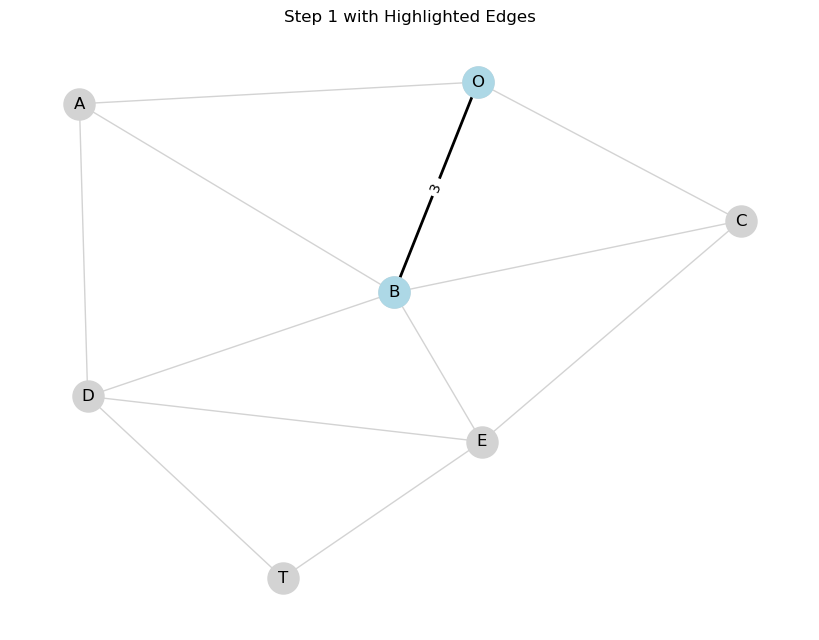

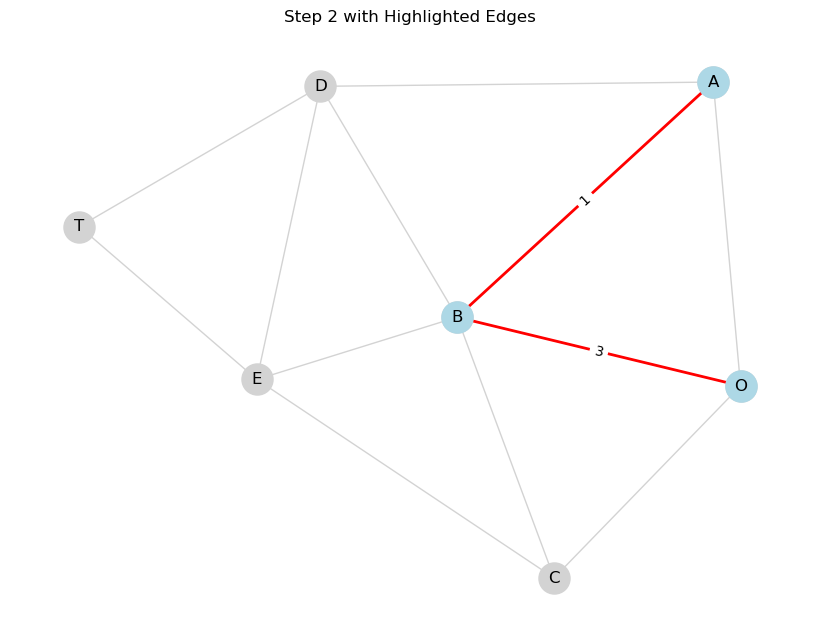

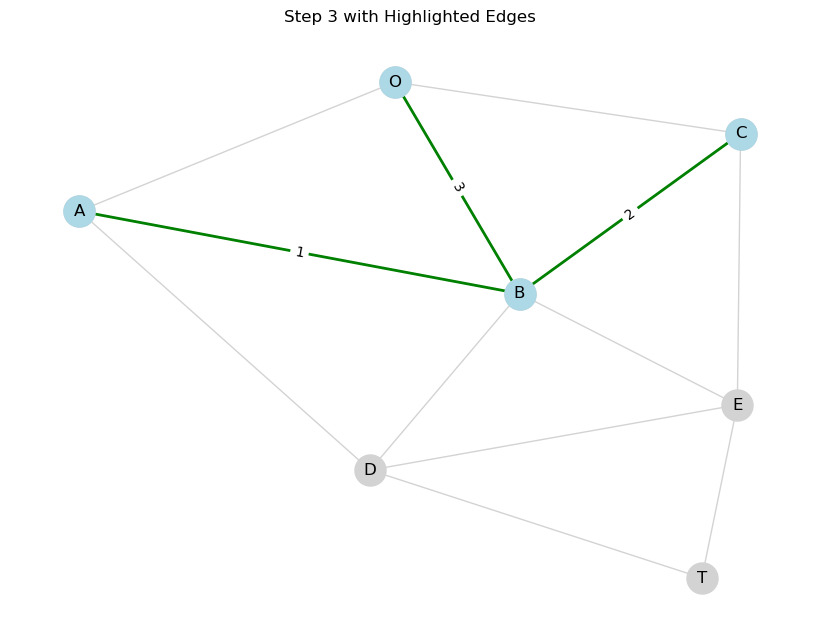

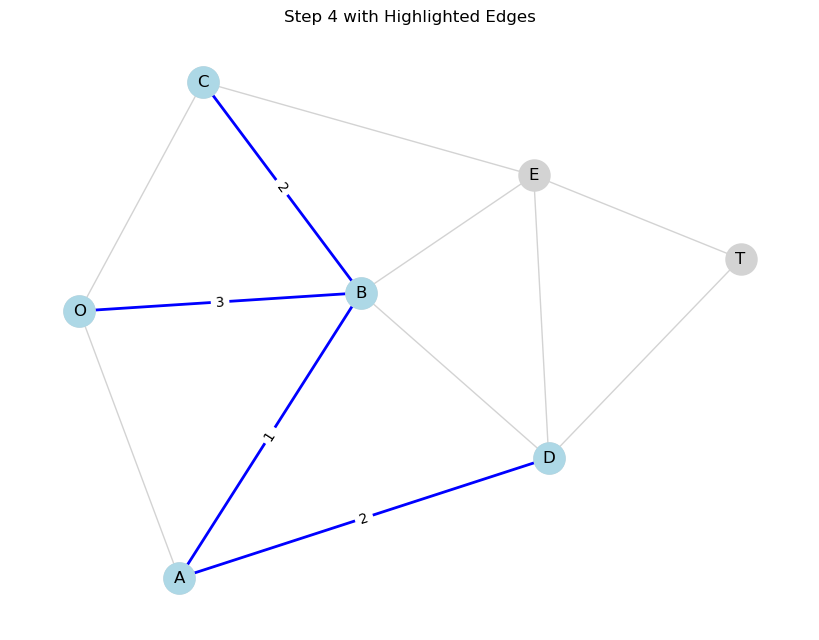

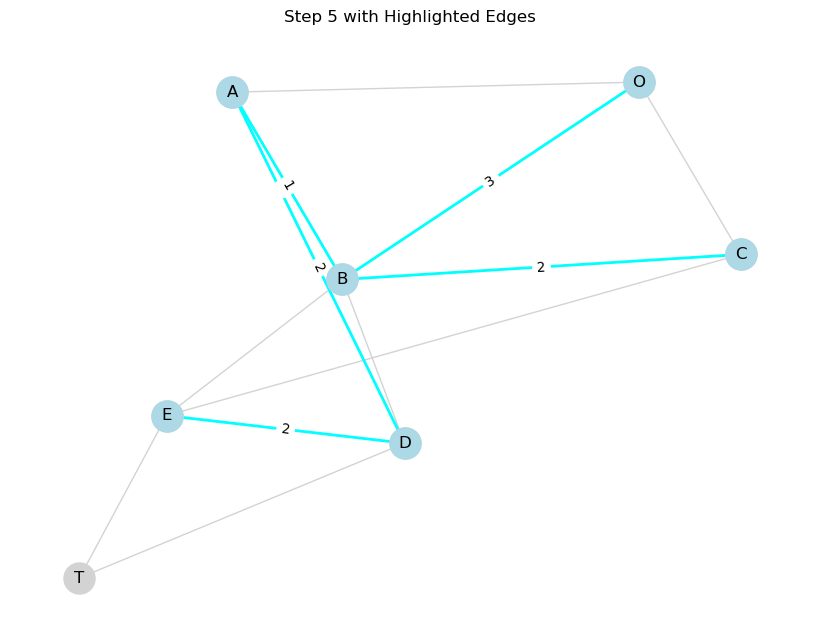

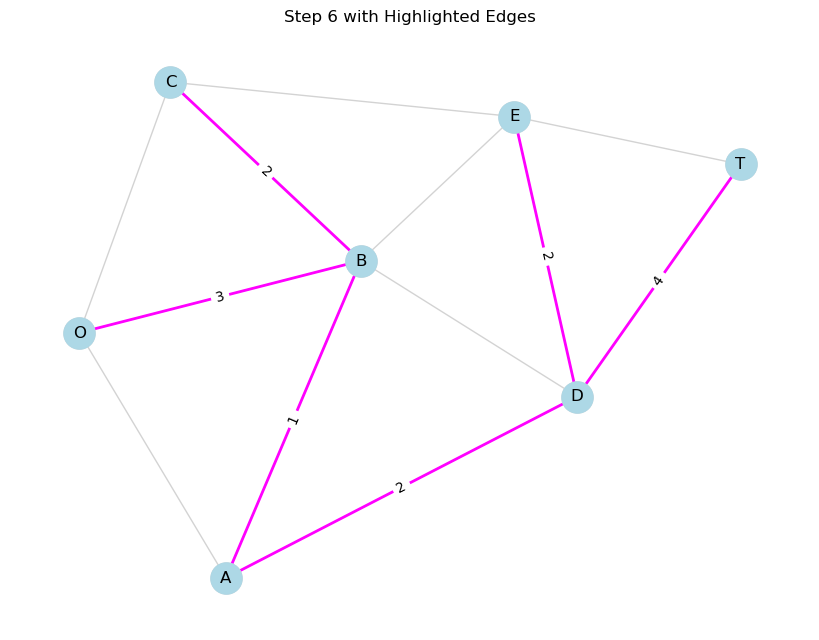

In [3]:
# Redefine the edges with the new node names
node_names = {1: 'O', 2: 'A', 3: 'B', 4: 'C', 5: 'D', 6: 'E', 7: 'T'}
edges_named = [(node_names[u], node_names[v], w) for u, v, w in edges]

# Create a new graph with named nodes
G_named = nx.Graph()
G_named.add_weighted_edges_from(edges_named)

# Apply Prim's algorithm with color differentiation and named nodes
steps_with_colors_named = prims_algorithm_with_colors(G_named, 'O')

# Plotting each step with different colors and named nodes
for i, (step, visited, color) in enumerate(steps_with_colors_named):
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G_named)  # Use the same layout for consistency

    # Draw the full graph with light colors
    nx.draw(G_named, pos, with_labels=True, node_color='lightgrey', edge_color='lightgrey', node_size=500)

    # Draw the current MST with highlighted colors
    nx.draw_networkx_nodes(step, pos, nodelist=visited, node_color='lightblue', node_size=500)
    nx.draw_networkx_edges(step, pos, edge_color=color, width=2)
    labels = nx.get_edge_attributes(step, 'weight')
    nx.draw_networkx_edge_labels(step, pos, edge_labels=labels)

    plt.title(f"Step {i+1} with Highlighted Edges")
    plt.show()


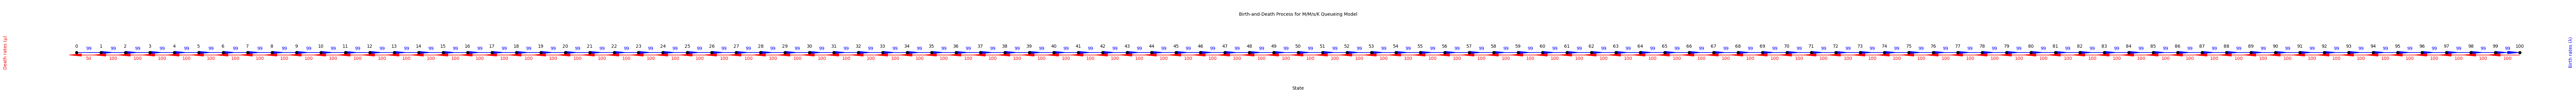

In [19]:
import matplotlib.pyplot as plt

# Parameters
s = 2       # number of servers
K = 100     # system capacity
states = range(K + 1)  # states 0 to 100

# Define the birth rates (lambda) and death rates (mu) for each state
birth_rates = [99 if n < K else 0 for n in states]
death_rates = [min(n, s) * 50 for n in states]

# Plot settings
fig, ax = plt.subplots(figsize=(100, 4))
ax.set_xlim(-1, K + 1)
ax.set_ylim(-1, 3)
ax.axis('off')  # Turn off the axis

# Draw the states
for state in states:
    ax.plot(state, 1, 'o', color='black')
    ax.text(state, 1.2, str(state), ha='center')

# Draw the arrows and rates for birth process
for state in states[:-1]:
    dx = 1 if state < K - 1 else 0.5  # Shorten the last arrow
    ax.arrow(state, 1, dx, 0, head_width=0.1, head_length=0.5, fc='blue', ec='blue')
    ax.text(state + 0.5, 1.1, str(birth_rates[state]), ha='center', color='blue')

# Draw the arrows and rates for death process
for state in states[1:]:
    ax.arrow(state, 0.9, -0.8, 0, head_width=0.1, head_length=0.5, fc='red', ec='red')
    if death_rates[state] != 0:  # Only label rates > 0
        ax.text(state - 0.5, 0.7, str(death_rates[state]), ha='center', color='red')

# Title and labels
ax.text(K/2, 2.5, 'Birth-and-Death Process for M/M/s/K Queueing Model', ha='center')
ax.text(K/2, -0.5, 'State', ha='center')
ax.text(-3, 1, 'Death rates (μ)', va='center', rotation='vertical', color='red')
ax.text(K+2, 1, 'Birth rates (λ)', va='center', rotation='vertical', color='blue')

# Show the plot
plt.savefig('birth-death-process.png', dpi=300, bbox_inches='tight')
plt.show()


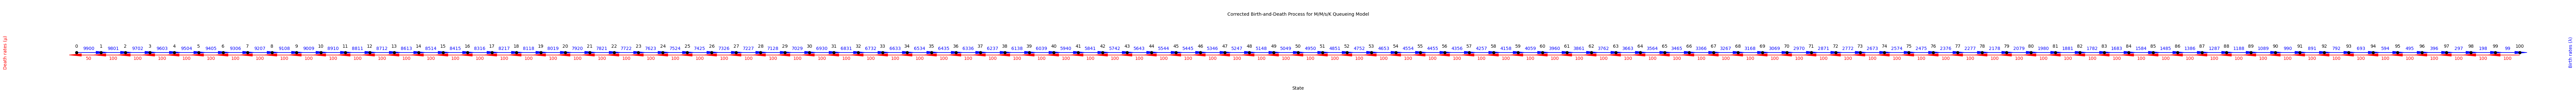

In [21]:
# Correcting the birth rates according to the given formula
N = K
birth_rates_corrected = [max((N-n)*99, 0) for n in states]

# Plot settings
fig, ax = plt.subplots(figsize=(100, 4))
ax.set_xlim(-1, K + 1)
ax.set_ylim(-1, 3)
ax.axis('off')  # Turn off the axis

# Draw the states
for state in states:
    ax.plot(state, 1, 'o', color='black')
    ax.text(state, 1.2, str(state), ha='center')

# Draw the arrows and rates for birth process with corrected rates
for state in states[:-1]:
    dx = 0.8  # Normal length for the arrow
    ax.arrow(state, 1, dx, 0, head_width=0.1, head_length=0.5, fc='blue', ec='blue')
    if birth_rates_corrected[state] != 0:  # Only label rates > 0
        ax.text(state + 0.5, 1.1, str(birth_rates_corrected[state]), ha='center', color='blue')

# Draw the arrows and rates for death process
for state in states[1:]:
    ax.arrow(state, 0.9, -0.8, 0, head_width=0.1, head_length=0.5, fc='red', ec='red')
    if death_rates[state] != 0:  # Only label rates > 0
        ax.text(state - 0.5, 0.7, str(death_rates[state]), ha='center', color='red')

# Title and labels
ax.text(K/2, 2.5, 'Corrected Birth-and-Death Process for M/M/s/K Queueing Model', ha='center')
ax.text(K/2, -0.5, 'State', ha='center')
ax.text(-3, 1, 'Death rates (μ)', va='center', rotation='vertical', color='red')
ax.text(K+2, 1, 'Birth rates (λ)', va='center', rotation='vertical', color='blue')

# Show the plot
plt.savefig('birth-death-process-corrected.png', dpi=300, bbox_inches='tight')
plt.show()


In [1]:
import math

# Given parameters for the M/M/s/K model
s = 2
K = 100
λ = 99
μ = 50

# Calculate c_n for n between 0 and K
def calculate_c_n(n, λ, μ, s):
    if n == 0:
        return 1
    elif 0 < n <= s:
        return (λ / μ)**n / math.factorial(n)
    elif s < n <= K:
        return (λ / μ)**s / math.factorial(s) * (λ / (s * μ))**(n - s)
    else:
        return 0

# Compute the sum of c_n from 1 to K to find p_0
c_values_sum = sum(calculate_c_n(n, λ, μ, s) for n in range(1, K + 1))
p_0 = 1 / (1 + c_values_sum)

p_0


0.00790353911170726

/home/ljb/mambaforge/envs/kaggle/lib/python3.10/site-packages/numpy/core/fromnumeric.py:43: RuntimeWarning: overflow encountered in accumulate
  result = getattr(asarray(obj), method)(*args, **kwds)


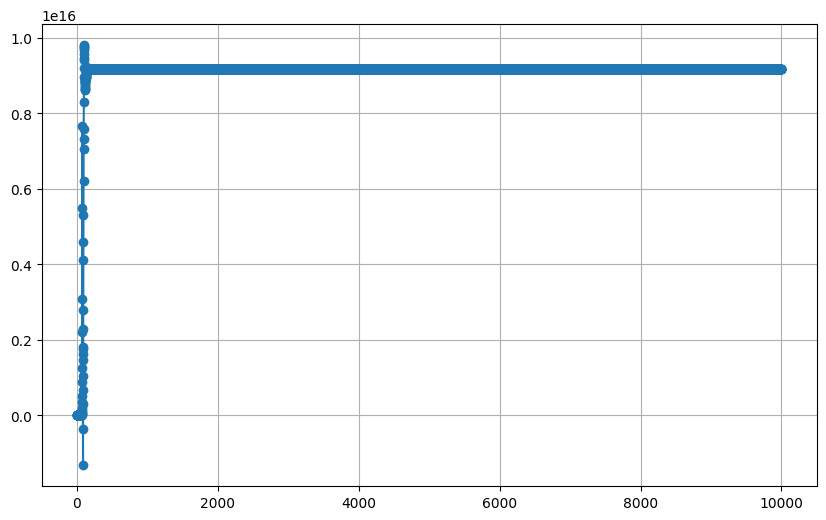

In [21]:
import numpy as np
import matplotlib.pyplot as plt
# 定义 lambda_n 和 mu_n
def lambda_n(n):
    return 3 if n % 2 == 0 else 1

mu = 1.1

# 计算 C_n 的前20项
n_values = np.arange(1, 10001)
lambda_n_product = np.cumprod([lambda_n(n) for n in n_values])
mu_n_product = np.cumprod([mu] * len(n_values))
C_n_values = lambda_n_product / mu_n_product

# 计算部分和序列
partial_sums = np.cumsum(C_n_values)

# 绘制部分和序列的图像
plt.figure(figsize=(10, 6))
plt.plot(n_values, partial_sums, marker='o')
# plt.title('数列 $\sum C_n$ 的部分和')
# plt.xlabel('项数 n')
# plt.ylabel('部分和 $\sum_{k=1}^{n} C_k$')
plt.grid(True)
plt.show()
